In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

Confusion Matrix:
[[96  4]
 [ 3  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.64      0.70      0.67        10

    accuracy                           0.94       110
   macro avg       0.80      0.83      0.82       110
weighted avg       0.94      0.94      0.94       110



In [ ]:
# Step 1: Generate synthetic data
# Generating 100 normal points (2 features) and 10 anomalous points
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(100, 2))  # 100 normal points
anomaly_data = np.random.uniform(low=-4, high=4, size=(10, 2))  # 10 anomalous points

In [ ]:
# normal_data has 100 rows and 2 columns (100 normal data points)
normal_data

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ],
       [ 0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259],
       [-1.15099358,  0.37569802],
       [-0.60063869, -0.29169375],
       [-0.60170661,  1.85227818],
       [-0.01349722, -1.05771093],
       [ 0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012],
       [-1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828],
       [-0.11564828, -0.3011037 ],
       [-1.47852199, -0.71984421],
       [-0.46063877,  1.05712223],
       [ 0.34361829, -1.76304016],
       [ 0.32408397, -0.38508228],
       [-0.676922  ,  0.61167629],
       [ 1.03099952,  0.93128012],
       [-0.83921752,

In [ ]:
# Anomaly_data has 10 rows and 2 columns (10 anomalous data points)"
anomaly_data

array([[ 3.01898458,  1.92614894],
       [ 1.57612593,  1.61987267],
       [-1.12407079, -1.65126525],
       [ 2.47488924,  2.48090716],
       [ 2.93657855,  3.30592442],
       [ 0.09073919,  0.01213036],
       [ 2.38636143,  1.19971145],
       [ 1.61573502,  2.36634136],
       [ 3.12004273, -1.29603875],
       [-0.99533638, -3.24814448]])

In [ ]:
# Combine normal and anomalous data
# stacks them vertically, resulting in 110 rows and 2 columns
# The first 100 rows in X are normal data, the last 10 rows are anomalies
X = np.vstack([normal_data, anomaly_data])
X

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ],
       [ 0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259],
       [-1.15099358,  0.37569802],
       [-0.60063869, -0.29169375],
       [-0.60170661,  1.85227818],
       [-0.01349722, -1.05771093],
       [ 0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012],
       [-1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828],
       [-0.11564828, -0.3011037 ],
       [-1.47852199, -0.71984421],
       [-0.46063877,  1.05712223],
       [ 0.34361829, -1.76304016],
       [ 0.32408397, -0.38508228],
       [-0.676922  ,  0.61167629],
       [ 1.03099952,  0.93128012],
       [-0.83921752,

In [8]:
print("Shape of combined X:", X.shape)

Shape of combined X: (110, 2)


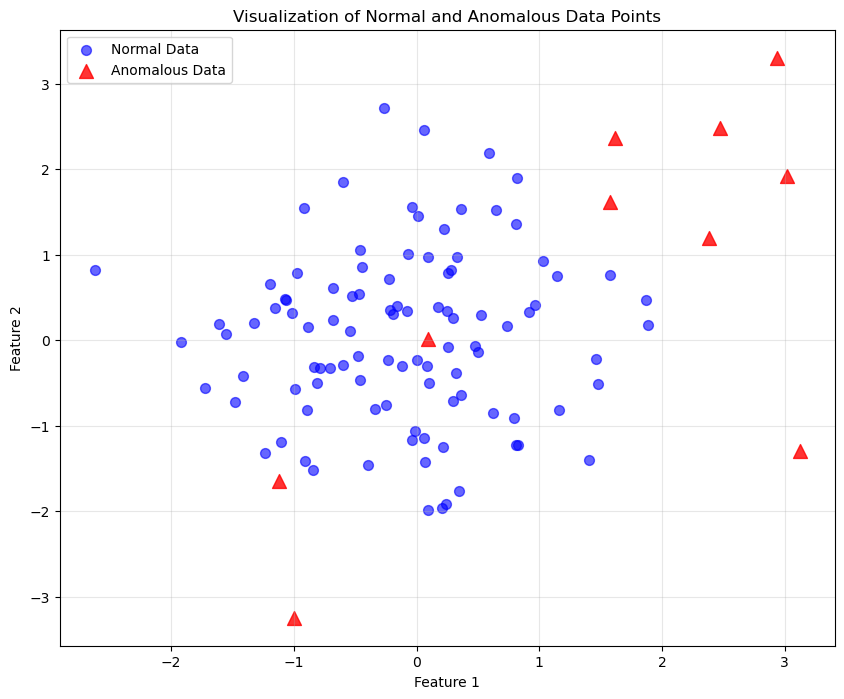

In [9]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 8))

# Plot normal data points (first 100 points)
plt.scatter(X[:100, 0], X[:100, 1], c='blue', alpha=0.6, label='Normal Data', s=50)

# Plot anomalous data points (last 10 points)
plt.scatter(X[100:, 0], X[100:, 1], c='red', alpha=0.8, label='Anomalous Data', s=100, marker='^')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Normal and Anomalous Data Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# True labels (1: Anomaly, 0: Normal)
y_true = np.array([0]*100 + [1]*10)  # 100 normal, 10 anomalies

# Step 2: Fit Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.1, random_state=42)
y_pred = model.fit_predict(X)

# Convert the output of fit_predict to binary labels (1: Anomaly, 0: Normal)
# IsolationForest outputs -1 for anomalies and 1 for normal data
y_pred = np.where(y_pred == -1, 1, 0)

In [12]:
# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[96  4]
 [ 3  7]]


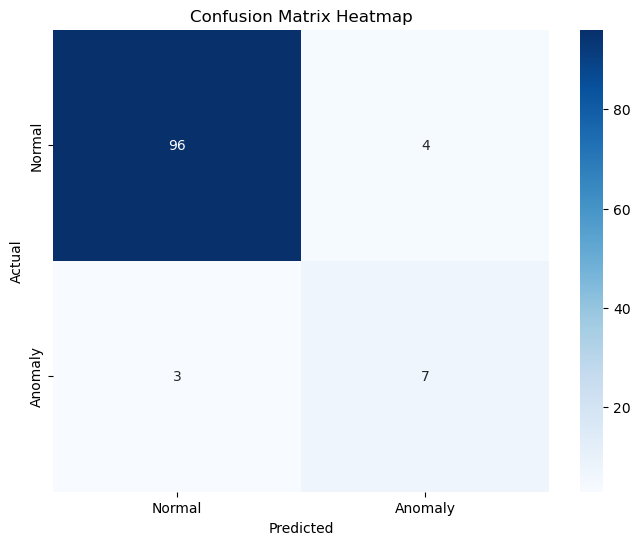

In [13]:
import seaborn as sns

# Visualize the confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Step 4: Additional metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.64      0.70      0.67        10

    accuracy                           0.94       110
   macro avg       0.80      0.83      0.82       110
weighted avg       0.94      0.94      0.94       110

